In [1]:
import sys
import pandas as pd
import numpy as np
import collections

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import font_manager as fm
from  matplotlib import cm

In [2]:
matplotlib.matplotlib_fname()
sh1 = pd.read_json('data/SH_ty1.json')
sh1_t = sh1.T
w = pd.read_json('data/WX_yao.json')

In [3]:
class Shanghan():
    def __init__(self):
        self.sh1 = pd.read_json('data/SH_ty1.json')
        self.wx = {y: sx for sx, yao in w.loc["药物"].iteritems() for y in yao}
        pass
        
        
    def bianzheng(self,zheng):#根据证输出对应方剂(简单根据伤寒的对应,而非根据心法)
        a = self.sh1.loc['证'].apply(lambda x: set(x['体证']))
        print(a[a.apply(lambda x: zheng <= x)].index[0])
        
                
    def find(self,find):#简单查询某一个方剂的信息
        self.find = find
        print(sh1[self.find])
        
    def count_all(self,yao):#可以查询每个方剂或药物在整个伤寒里的统计
        a = self.sh1.loc['方']
        s = a[a.apply(lambda x: yao in x)].count()
        print(s)
        
    
    def draw_dir_all(self):#画每一个方剂的方向图
        fang = self.sh1.loc['方']
        sx = [self.wx.get(y,"暂不明") for f in fang for y in f]
        sx_len = len(sx)
        qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}
        
        #----------------下面是画饼图-----------------------------------
        
        labels = list(qq.keys())
        X = list(qq.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        #fig = plt.figure(1, figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)

        plt.title("伤寒全部方剂五行方向图", pad = 30)
        plt.axis('equal')
        plt.show()  
        
        
        
    def draw_dir(self,f):
        fang = self.sh1.loc['方'][f]
        sx = [self.wx.get(y, "暂不明") for y in fang]
        fang_len = len(fang)
        qq = {s: cnt / fang_len for s, cnt in collections.Counter(sx).items()}  #字典解析
        
        #----------------下面是画饼图-----------------------------------
         
        labels = list(qq.keys())
        X = list(qq.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        title = str(f)+'的五行方向图'
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)
        
        
        plt.title(title, pad = 30)
        plt.axis('equal')
        plt.show()  
        


In [10]:
sh1.loc['方']["桂枝汤"]

{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '12枚'}

In [4]:
br1 = Shanghan()

In [5]:
sh1.head()

,桂枝汤,桂枝加葛根汤,桂枝加附子汤,桂枝去芍药汤,桂枝去芍药加附子汤,桂枝麻黄各半汤,桂枝二麻黄一汤,白虎加人参汤,桂枝二越婢一汤,桂枝去桂加茯苓白术汤,...,麻黄升麻汤,干姜黄芩黄连人参汤,白头翁汤,四逆加人参汤,理中丸,通脉四逆加猪胆汤,烧裈散,枳实栀子汤,牡蛎泽泻散,竹叶石膏汤
六经,"{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '阳明'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}",...,"{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '少阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '阳明'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '阳明'}"
原文,"{'对应证原文': ['吐利止。而身痛不休者。当消息和解其外。宜桂枝汤小和之。'], '方剂...","{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...,"{'对应证原文': ['太阳病。下之后。脉促。胸满者。桂枝去芍药汤主之。'], '方剂原文'...","{'对应证原文': ['若微寒者。桂枝去芍药加附子汤主之。'], '方剂原文': '桂枝三两...",{'对应证原文': ['面色反有热色者。未欲解也。以其不能得小汗出 。 身必痒。宜桂枝麻黄各...,{'对应证原文': ['服桂枝汤。大汗出。脉洪大者。与桂枝汤如前法。若形似疟。一日再发者。汗...,"{'对应证原文': ['若渴欲饮水。口干舌燥者。白虎加人参汤主之。'], '方剂原文': '...",{'对应证原文': ['太阳病。发热恶寒。热多寒少。脉微弱者。此无阳也。不可发汗。宜桂枝二越...,{'对应证原文': ['服桂枝汤。或下之。仍头项强痛。翕翕发热。无汗。心下满微痛。小便不利者...,...,{'对应证原文': ['伤寒。六七日。大下后。寸脉沉而迟。手足厥逆。下部脉不至。喉咽不利。唾...,{'对应证原文': ['伤寒。本自寒下。医复吐下之。寒格。更逆吐下。若食入口即吐。干姜黄芩黄...,"{'对应证原文': ['热利下重者。白头翁汤主之。'], '方剂原文': '白头翁二两 黄蘗...","{'对应证原文': ['恶寒。脉微而复利。利止。亡血也。四逆加人参汤主之。'], '方剂原文...","{'对应证原文': ['大病差后。喜唾。久不了了。胸上有寒。当以丸药温之。宜理中丸。'], ...",{'对应证原文': ['吐已下断。汗出而厥。四肢拘急不解。脉微欲绝者。通脉四逆加猪胆汤主之。...,{'对应证原文': ['伤寒阴易之为病。其人身体重。少气。少腹里急。或引阴中拘挛。热上冲胸。...,"{'对应证原文': ['大病差后。劳复者。枳实栀子汤主之。'], '方剂原文': '枳实三枚...","{'对应证原文': ['大病差后。从腰以下有水气者。牡蛎泽泻散主之。'], '方剂原文': ...","{'对应证原文': ['伤寒解后。虚羸少气。气逆欲吐。竹叶石膏汤主之。'], '方剂原文':..."
方,"{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...","{'葛根': '4两', '桂枝': '3两', '芍药': '2两', '炙甘草': '2...","{'附子': '1两', '桂枝': '3两', '芍药': '3两', '炙甘草': '3...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'桂枝': '1两16铢', '炙甘草': '1两', '生姜': '1两', '大枣':...","{'桂枝': '1两17铢', '炙甘草': '1两6铢', '生姜': '1两6铢', '...","{'知母': '6两', '石膏': '1斤', '粳米': '6合', '炙甘草': '2...","{'桂枝': '1两', '芍药': '1两', '炙甘草': '1两', '麻黄': '1...","{'白术': '3两', '芍药': '3两', '炙甘草': '2两', '茯苓': '3...",...,"{'茯苓': '6株', '炙甘草': '6株', '干姜': '6株', '桂枝': '6...","{'人参': '3两', '黄芩': '3两', '干姜': '3两', '黄连': '3两'}","{'白头翁': '2两', '黄蘗': '3两', '黄连': '3两', '秦皮': '3两'}","{'人参': '1两', '附子': '1枚', '炙甘草': '3两', '干姜': '1...","{'人参': '3两', '干姜': '3两', '炙甘草': '3两', '白术': '3两'}","{'附子': '1枚', '炙甘草': '2两', '干姜': '3两', '猪胆汁': '...",{'妇人中裈近隐处之烧灰': '一些'},"{'枳实': '3枚', '栀子': '14个', '豉': '1升'}","{'柴胡': '0.5斤', '黄芩': '3两', '人参': '3两', '半夏': '...","{'竹叶': '2把', '石膏': '1斤', '半夏': '1升', '麦门冬': '1..."
证,"{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'...","{'体证': ['大便后胸胀'], '脉证': ['急促']}","{'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}","{'体证': ['身痒'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}","{'体证': ['严重头痛', '发热无汗', '心下满', '小便不多', '身体微痛']...",...,"{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['喜睡眠', '胸满胁痛'], '脉证': ['脉细']}","{'体证': ['消渴'], '脉证': ['脉沉紧']}","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['喜睡眠', '胸满胁痛'], '脉证': ['脉细']}","{'体证': ['消渴'], '脉证': ['脉沉紧']}"


In [14]:
a1 = sh1.columns

In [6]:
br1.bianzheng(['怕风'])

TypeError: '<=' not supported between instances of 'list' and 'set'

In [15]:
a2 = list(a1)

In [16]:
len(a2)#一共有111个独特的方子,但需要计算重复的

111

In [17]:
a2.count("桂枝汤")

1

In [18]:
sh1.columns.contains("桂枝汤")

True

In [19]:
br1.count_all("柴胡")

7


In [20]:
sh1.index

Index(['六经', '原文', '方', '证'], dtype='object')

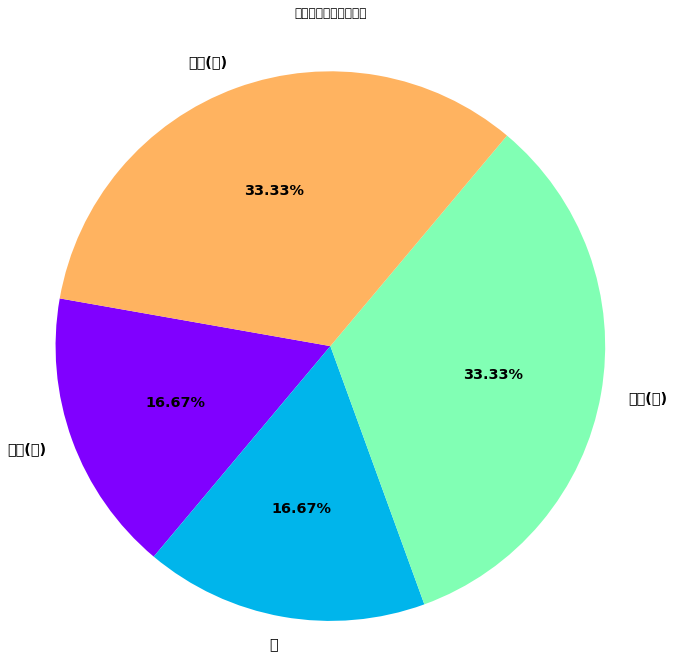

In [8]:
br1.draw_dir('小柴胡汤')

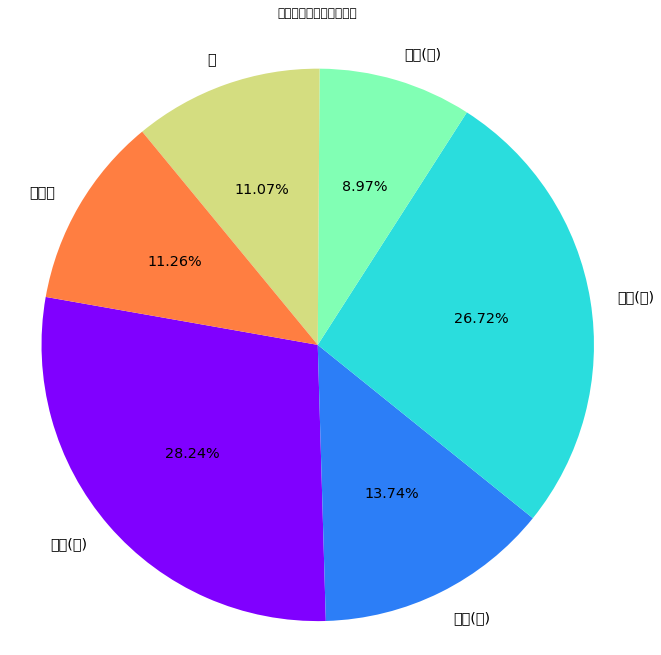

In [22]:
br1.draw_dir_all()

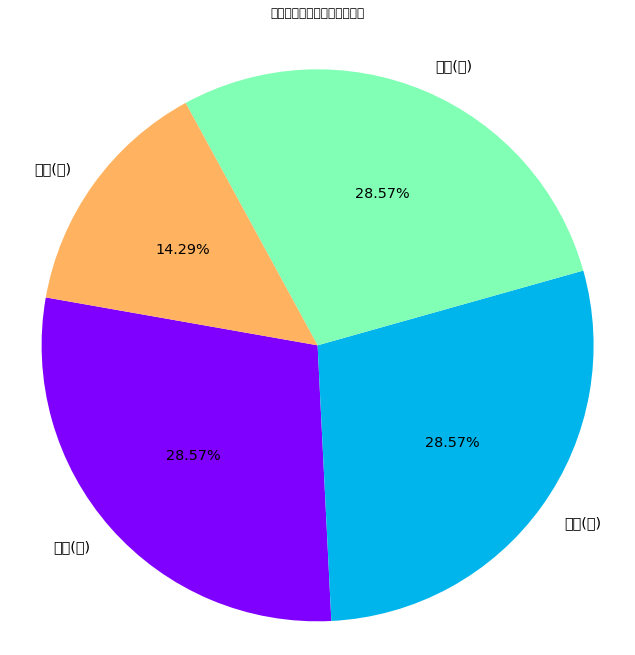

In [23]:
br1.draw_dir('桂枝麻黄各半汤')

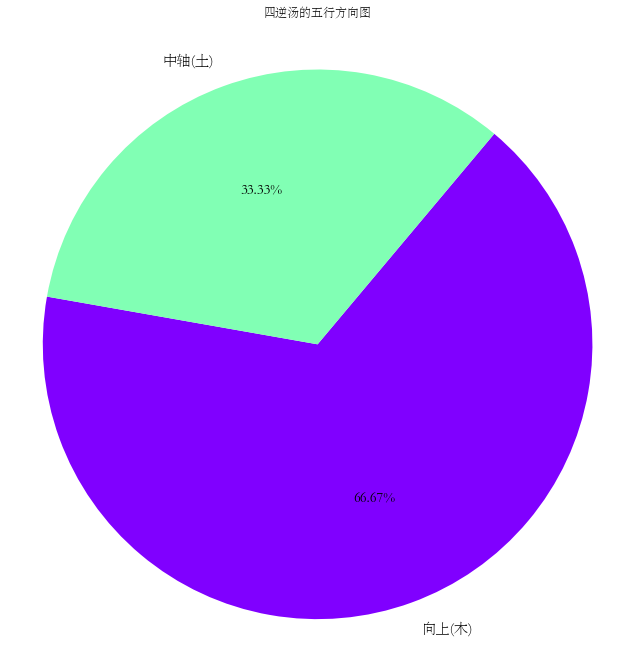

In [17]:
br1.draw_dir('四逆汤')

In [18]:
br1.bianzheng({'口苦'})

桂枝去芍药加附子汤


In [19]:
br1.bianzheng({'怕风'})

桂枝汤


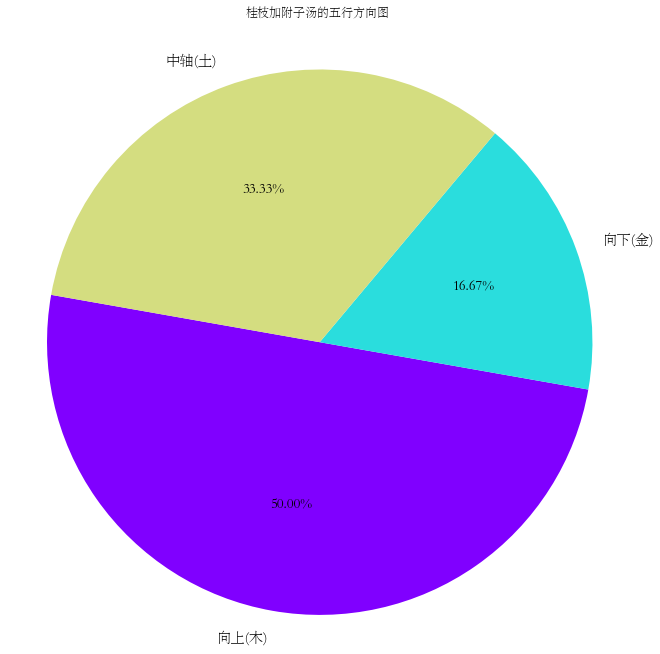

In [20]:
br1.draw_dir('桂枝加附子汤')

In [21]:
br1.count_all('炙甘草')

65


In [22]:
sh1

,桂枝汤,桂枝加葛根汤,桂枝加附子汤,桂枝去芍药汤,桂枝去芍药加附子汤,桂枝麻黄各半汤,桂枝二麻黄一汤,白虎加人参汤,桂枝二越婢一汤,桂枝去桂加茯苓白术汤,...,麻黄升麻汤,干姜黄芩黄连人参汤,白头翁汤,四逆加人参汤,理中丸,通脉四逆加猪胆汤,烧裈散,枳实栀子汤,牡蛎泽泻散,竹叶石膏汤
六经,"{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '阳明'}","{'阴阳': '阳', '三经': '太阳'}","{'阴阳': '阳', '三经': '太阳'}",...,"{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '少阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '阳明'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阴', '三经': '厥阴'}","{'阴阳': '阳', '三经': '阳明'}"
原文,"{'对应证原文': ['吐利止。而身痛不休者。当消息和解其外。宜桂枝汤小和之。'], '方剂...","{'对应证原文': ['太阳病，项背强几几，反汗出恶风者，桂枝加葛根汤主之。', '太阳与阳...",{'对应证原文': ['太阳病，发汗，遂漏不止，其人恶风，小便难，四支微急，难以屈伸者，桂枝...,"{'对应证原文': ['太阳病。下之后。脉促。胸满者。桂枝去芍药汤主之。'], '方剂原文'...","{'对应证原文': ['若微寒者。桂枝去芍药加附子汤主之。'], '方剂原文': '桂枝三两...",{'对应证原文': ['面色反有热色者。未欲解也。以其不能得小汗出 。 身必痒。宜桂枝麻黄各...,{'对应证原文': ['服桂枝汤。大汗出。脉洪大者。与桂枝汤如前法。若形似疟。一日再发者。汗...,"{'对应证原文': ['若渴欲饮水。口干舌燥者。白虎加人参汤主之。'], '方剂原文': '...",{'对应证原文': ['太阳病。发热恶寒。热多寒少。脉微弱者。此无阳也。不可发汗。宜桂枝二越...,{'对应证原文': ['服桂枝汤。或下之。仍头项强痛。翕翕发热。无汗。心下满微痛。小便不利者...,...,{'对应证原文': ['伤寒。六七日。大下后。寸脉沉而迟。手足厥逆。下部脉不至。喉咽不利。唾...,{'对应证原文': ['伤寒。本自寒下。医复吐下之。寒格。更逆吐下。若食入口即吐。干姜黄芩黄...,"{'对应证原文': ['热利下重者。白头翁汤主之。'], '方剂原文': '白头翁二两 黄蘗...","{'对应证原文': ['恶寒。脉微而复利。利止。亡血也。四逆加人参汤主之。'], '方剂原文...","{'对应证原文': ['大病差后。喜唾。久不了了。胸上有寒。当以丸药温之。宜理中丸。'], ...",{'对应证原文': ['吐已下断。汗出而厥。四肢拘急不解。脉微欲绝者。通脉四逆加猪胆汤主之。...,{'对应证原文': ['伤寒阴易之为病。其人身体重。少气。少腹里急。或引阴中拘挛。热上冲胸。...,"{'对应证原文': ['大病差后。劳复者。枳实栀子汤主之。'], '方剂原文': '枳实三枚...","{'对应证原文': ['大病差后。从腰以下有水气者。牡蛎泽泻散主之。'], '方剂原文': ...","{'对应证原文': ['伤寒解后。虚羸少气。气逆欲吐。竹叶石膏汤主之。'], '方剂原文':..."
方,"{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...","{'葛根': '4两', '桂枝': '3两', '芍药': '2两', '炙甘草': '2...","{'附子': '1两', '桂枝': '3两', '芍药': '3两', '炙甘草': '3...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'桂枝': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '1...","{'桂枝': '1两16铢', '炙甘草': '1两', '生姜': '1两', '大枣':...","{'桂枝': '1两17铢', '炙甘草': '1两6铢', '生姜': '1两6铢', '...","{'知母': '6两', '石膏': '1斤', '粳米': '6合', '炙甘草': '2...","{'桂枝': '1两', '芍药': '1两', '炙甘草': '1两', '麻黄': '1...","{'白术': '3两', '芍药': '3两', '炙甘草': '2两', '茯苓': '3...",...,"{'茯苓': '6株', '炙甘草': '6株', '干姜': '6株', '桂枝': '6...","{'人参': '3两', '黄芩': '3两', '干姜': '3两', '黄连': '3两'}","{'白头翁': '2两', '黄蘗': '3两', '黄连': '3两', '秦皮': '3两'}","{'人参': '1两', '附子': '1枚', '炙甘草': '3两', '干姜': '1...","{'人参': '3两', '干姜': '3两', '炙甘草': '3两', '白术': '3两'}","{'附子': '1枚', '炙甘草': '2两', '干姜': '3两', '猪胆汁': '...",{'妇人中裈近隐处之烧灰': '一些'},"{'枳实': '3枚', '栀子': '14个', '豉': '1升'}","{'柴胡': '0.5斤', '黄芩': '3两', '人参': '3两', '半夏': '...","{'竹叶': '2把', '石膏': '1斤', '半夏': '1升', '麦门冬': '1..."
证,"{'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...","{'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}","{'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'...","{'体证': ['大便后胸胀'], '脉证': ['急促']}","{'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}","{'体证': ['身痒'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}","{'体证': ['严重头痛', '发热无汗', '心下满', '小便不多', '身体微痛']...",...,"{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['暂无'], '脉证': ['暂无']}","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['喜睡眠', '胸满胁痛'], '脉证': ['脉细']}","{'体证': ['消渴'], '脉证': ['脉沉紧']}","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...","{'体证': ['喜睡眠', '胸满胁痛'], '脉证': ['脉细']}","{'体证': ['消渴'], '脉证': ['脉沉紧']}"


In [23]:
sh1.loc['证'].apply(lambda x: set(x['体证']))

桂枝汤                         {怕风, 头痛, 怕冷, 出汗, 干呕, 鼻涕, 发热}
桂枝加葛根汤                                        {怕风, 肌肉酸痛}
桂枝加附子汤                         {怕风, 四肢难以屈伸, 小便难, 大量出汗不止}
桂枝去芍药汤                                           {大便后胸胀}
桂枝去芍药加附子汤                                     {口苦, 轻微寒冷}
桂枝麻黄各半汤                                             {身痒}
桂枝二麻黄一汤                                             {暂无}
白虎加人参汤                                              {暂无}
桂枝二越婢一汤                                     {发热怕冷, 热多寒少}
桂枝去桂加茯苓白术汤                 {身体微痛, 小便不多, 严重头痛, 发热无汗, 心下满}
甘草干姜汤                                       {烦躁, 吐, 咽喉干}
芍药甘草汤                                               {暂无}
调胃承气汤                                               {暂无}
四逆汤                  {长期焦虑, 长期抑郁, 总想睡觉, 四肢冷, 自感体虚, 没有精神}
葛根汤                                         {怕风, 无汗, 背痛}
葛根加半夏汤                                          {无小便而呕吐}
葛根黄芩黄连汤                                     {喘而出汗, 小便不止}
麻黄汤                      {头痛, 怕

In [24]:
sh1.loc['证']

桂枝汤                  {'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...
桂枝加葛根汤                             {'体证': ['肌肉酸痛', '怕风'], '脉证': ['无']}
桂枝加附子汤               {'体证': ['大量出汗不止', '怕风', '小便难', '四肢难以屈伸'], '脉证'...
桂枝去芍药汤                                 {'体证': ['大便后胸胀'], '脉证': ['急促']}
桂枝去芍药加附子汤                         {'体证': ['口苦', '轻微寒冷'], '脉证': ['暂无']}
桂枝麻黄各半汤                                   {'体证': ['身痒'], '脉证': ['暂无']}
桂枝二麻黄一汤                                   {'体证': ['暂无'], '脉证': ['暂无']}
白虎加人参汤                                    {'体证': ['暂无'], '脉证': ['暂无']}
桂枝二越婢一汤                         {'体证': ['发热怕冷', '热多寒少'], '脉证': ['微弱']}
桂枝去桂加茯苓白术汤           {'体证': ['严重头痛', '发热无汗', '心下满', '小便不多', '身体微痛']...
甘草干姜汤                         {'体证': ['咽喉干', '烦躁', '吐'], '脉证': ['暂无']}
芍药甘草汤                                     {'体证': ['暂无'], '脉证': ['暂无']}
调胃承气汤                                    {'体证': ['暂无'], '脉证': ['脉沉紧']}
四逆汤                  {'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...
葛根汤   

In [27]:
zz = {'鼻涕','怕风'}

In [28]:
a = sh1.loc['证'].apply(lambda x: set(x['体证']))

In [29]:
print(a[a.apply(lambda x: zz < x)].index[0])

桂枝汤


In [30]:
s = '怕风'

In [31]:
repr(s)

"'怕风'"

In [32]:
print(str(s))

怕风


In [33]:
len(sh1.loc['方'].apply(lambda x: x['桂枝']))

KeyError: '桂枝'

In [34]:
br1.find('四逆汤')

六经                              {'阴阳': '阴', '三经': '厥阴'}
原文    {'对应证原文': ['吐利汗出。发热恶寒。四肢拘急。手足厥冷者。四逆汤主之。', '既吐且...
方                 {'附子': '1枚', '炙甘草': '2两', '干姜': '1两'}
证     {'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...
Name: 四逆汤, dtype: object


In [35]:
w

,中轴(土),向下(金),火,收藏(水),向上(木)
味,甘甜,酸,咸,苦,辛辣
药物,"[炙甘草, 人参, 大枣, 茯苓, 胶饴, 麦门冬, 升麻, 瓜蒂, 鸡子黄]","[芍药, 柴胡, 杏仁, 石膏, 五味子, 枳实, 铅丹, 龙骨, 牡蛎, 豉, 香豉]","[大黄, 芒硝, 黄连, 黄芩, 泽泻, 厚朴, 通草, 葱白]","[地黄, 麻黄, 葛根, 白术, 知母, 猪苓, 栀子, 香豉, 竹叶, 栀子]","[生姜, 附子, 桂枝, 半夏, 干姜, 粳米, 细辛, 阿胶, 赤小豆, 蜀椒]"


In [36]:
{i: i for i in range(10)}

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [37]:
{y: sx for sx, yao in w.loc["药物"].iteritems() for y in yao}  # 字典生成shi

{'炙甘草': '中轴(土)',
 '人参': '中轴(土)',
 '大枣': '中轴(土)',
 '茯苓': '中轴(土)',
 '胶饴': '中轴(土)',
 '麦门冬': '中轴(土)',
 '升麻': '中轴(土)',
 '瓜蒂': '中轴(土)',
 '鸡子黄': '中轴(土)',
 '芍药': '向下(金)',
 '柴胡': '向下(金)',
 '杏仁': '向下(金)',
 '石膏': '向下(金)',
 '五味子': '向下(金)',
 '枳实': '向下(金)',
 '铅丹': '向下(金)',
 '龙骨': '向下(金)',
 '牡蛎': '向下(金)',
 '豉': '向下(金)',
 '香豉': '收藏(水)',
 '大黄': '火',
 '芒硝': '火',
 '黄连': '火',
 '黄芩': '火',
 '泽泻': '火',
 '厚朴': '火',
 '通草': '火',
 '葱白': '火',
 '地黄': '收藏(水)',
 '麻黄': '收藏(水)',
 '葛根': '收藏(水)',
 '白术': '收藏(水)',
 '知母': '收藏(水)',
 '猪苓': '收藏(水)',
 '栀子': '收藏(水)',
 '竹叶': '收藏(水)',
 '生姜': '向上(木)',
 '附子': '向上(木)',
 '桂枝': '向上(木)',
 '半夏': '向上(木)',
 '干姜': '向上(木)',
 '粳米': '向上(木)',
 '细辛': '向上(木)',
 '阿胶': '向上(木)',
 '赤小豆': '向上(木)',
 '蜀椒': '向上(木)'}

In [38]:
y_x = {}
for sx, yao in w.loc["药物"].iteritems():
    for y in yao:
        y_x[y] = sx
y_x

{'炙甘草': '中轴(土)',
 '人参': '中轴(土)',
 '大枣': '中轴(土)',
 '茯苓': '中轴(土)',
 '胶饴': '中轴(土)',
 '麦门冬': '中轴(土)',
 '升麻': '中轴(土)',
 '瓜蒂': '中轴(土)',
 '鸡子黄': '中轴(土)',
 '芍药': '向下(金)',
 '柴胡': '向下(金)',
 '杏仁': '向下(金)',
 '石膏': '向下(金)',
 '五味子': '向下(金)',
 '枳实': '向下(金)',
 '铅丹': '向下(金)',
 '龙骨': '向下(金)',
 '牡蛎': '向下(金)',
 '豉': '向下(金)',
 '香豉': '收藏(水)',
 '大黄': '火',
 '芒硝': '火',
 '黄连': '火',
 '黄芩': '火',
 '泽泻': '火',
 '厚朴': '火',
 '通草': '火',
 '葱白': '火',
 '地黄': '收藏(水)',
 '麻黄': '收藏(水)',
 '葛根': '收藏(水)',
 '白术': '收藏(水)',
 '知母': '收藏(水)',
 '猪苓': '收藏(水)',
 '栀子': '收藏(水)',
 '竹叶': '收藏(水)',
 '生姜': '向上(木)',
 '附子': '向上(木)',
 '桂枝': '向上(木)',
 '半夏': '向上(木)',
 '干姜': '向上(木)',
 '粳米': '向上(木)',
 '细辛': '向上(木)',
 '阿胶': '向上(木)',
 '赤小豆': '向上(木)',
 '蜀椒': '向上(木)'}

In [ ]:
sh1

In [ ]:
fang = sh1.loc["方"]
fang

In [ ]:
sx = [y_x.get(y, "土") for f in fang for y in f]
sx_len = len(sx)
{y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}

In [ ]:
import collections

def count(x):
    sx = [y_x.get(y, "土") for y in x]
    x_len = len(x)
#     d = {}
#     print(sx)
#     for s, cnt in collections.Counter(sx).items():
#         d[s] = cnt / x_len
#     return d
    return {s: cnt / x_len for s, cnt in collections.Counter(sx).items()}#字典解析

q1 = fang.apply(count)

fig = plt.figure()
plt.pie(x,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Pie chart")
  
 
plt.show()

In [ ]:
import collections

In [ ]:
collections.Counter([1, 1, 3]).items()

In [ ]:
sh1.head()

In [ ]:
sh1.shape#貌似没算重复,这个不行

In [8]:
sh1.桂枝汤

六经                              {'阴阳': '阴', '三经': '厥阴'}
原文    {'对应证原文': ['吐利止。而身痛不休者。当消息和解其外。宜桂枝汤小和之。'], '方剂...
方     {'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3...
证     {'体证': ['发热', '鼻涕', '怕冷', '怕风', '干呕', '头痛', '出...
Name: 桂枝汤, dtype: object